# Importar librerías y archivos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_students=pd.read_csv('datasets/clean_students_complete.csv',index_col=0).set_index('Student ID')
data_students.head()

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,Richard Scott,M,12th,Huang High School,67,58
4,Bonnie Ray,F,9th,Huang High School,97,84


# Actividad Básicas: Alumnos

Crea/Presenta  la forma que creas más conveniente para describir cuántos alumnos hay por grados. 

In [3]:
# mostrar cuántos alumnos hay por grado (cantidad de veces que un valor único de grado tiene ocurrencia en el df)
data_students.grade.value_counts()

9th     11408
10th    10168
11th     9695
12th     7899
Name: grade, dtype: int64

Plotear lo anterior en un gráfico de barras

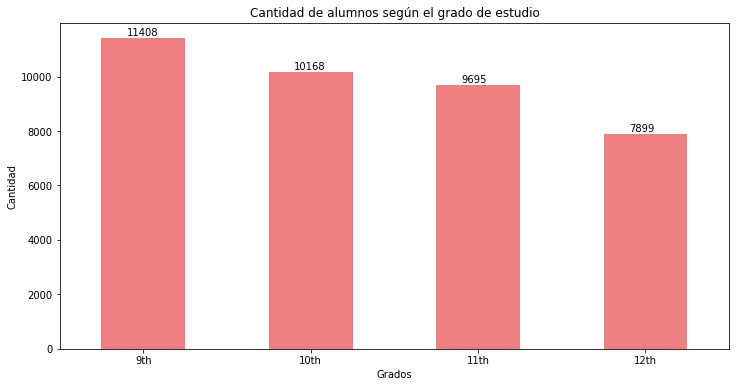

In [4]:
# plotear el gráfico de barras
data_students.grade.value_counts().plot(kind='bar',figsize=(12,6),color='lightcoral',rot=0)

# anotar etiquetas
y=data_students.grade.value_counts().tolist()
for x in range(len(y)):
    plt.text(x-0.1,y[x]+100,y[x])
    
# label en los ejes y título
plt.xlabel('Grados')
plt.ylabel('Cantidad')
plt.title('Cantidad de alumnos según el grado de estudio')
plt.show()

# Actividad Avanzada: Alumnos

Crea/Presenta  la forma que creas más conveniente para describir cuántos alumnos hay por grados, segmentanto por género, asignatura y grado.

In [5]:
# Definir función para segmentación
import re
def plot_segementacion_grado(df,asignatura='math_score',puntaje='mejor'):
    # diccionario de mejor y peor puntaje
    puntajes_extremos={'mejor':df[asignatura].max(),'peor':df[asignatura].min()}
    
    # seleccionar puntaje
    puntaje_seleccionado=puntajes_extremos[puntaje] if str(puntaje).isalpha() else puntaje
    
    # plotear puntajes
    # obtener dataframe según el query
    df_secc=df.loc[df[asignatura]==puntaje_seleccionado,['grade','gender']].copy()

    # realizar dummies de genero
    dummies_genero=pd.concat([df_secc['gender'],pd.get_dummies(df_secc,columns=['gender'])],axis=1)
    
    # agrupar por grado y sumar el grado
    plot_grouped=dummies_genero.groupby(['grade']).sum()
    
    # modificar el indices temporalmente
    df_index=plot_grouped.reset_index()
    df_index.grade=df_index.grade.apply(lambda x:int(re.findall(r'[0-9]+',x)[0]))
    df_index=df_index.sort_values(by='grade')
    df_index=df_index.set_index('grade')
    df_index.plot(kind='bar',figsize=(15,6),rot=0)
    plt.xticks(range(len(df_index.index.values)),[f'{i}th'for i in df_index.index.values])
    plt.title(f'''Cantidad de alumnos acordes a la segmentación para la asignatura {asignatura.split(sep='_')[0].upper()} 
            con el puntaje de {puntaje_seleccionado}''')
    plt.legend(loc='upper right')
    plt.show()

Usar la función para reading_score y math_score

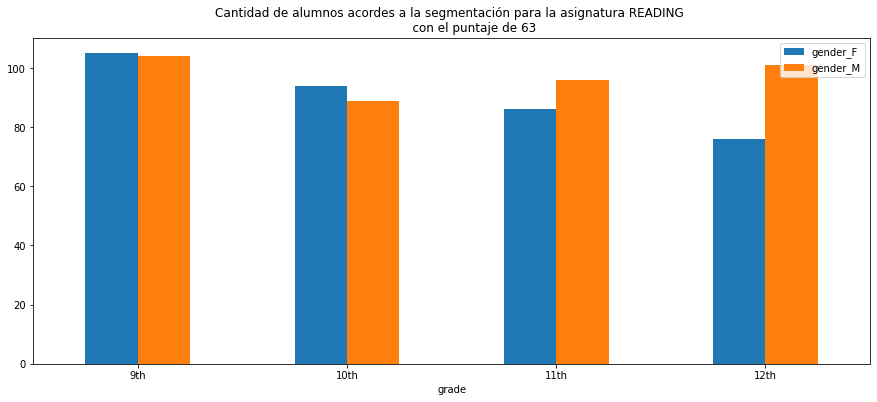

In [6]:
plot_segementacion_grado(data_students,asignatura='reading_score',puntaje='peor')

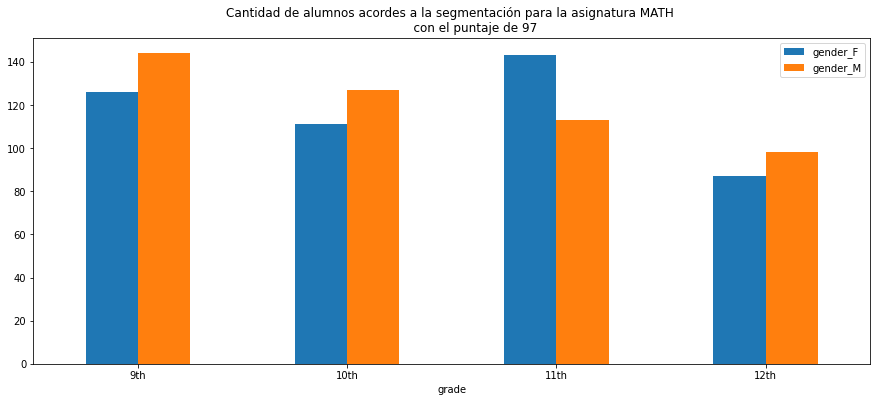

In [7]:
plot_segementacion_grado(data_students,asignatura='math_score',puntaje=97)

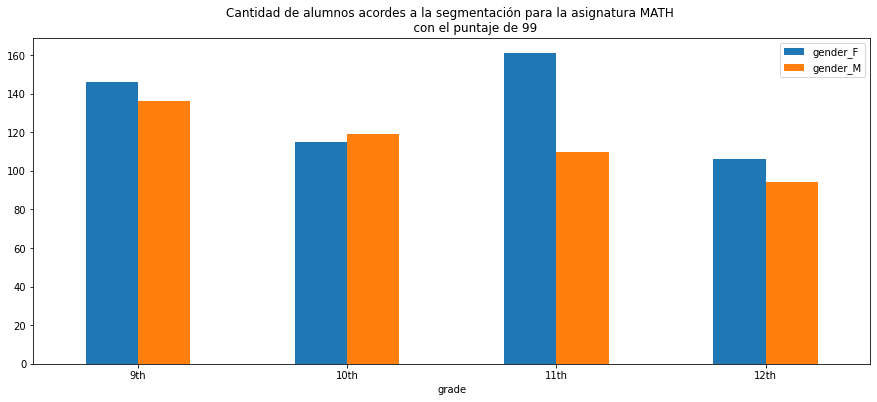

In [8]:
plot_segementacion_grado(data_students,asignatura='math_score',puntaje='mejor')